Tomato Model Training 

Import Libraries 

In [58]:
import os
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from PIL import Image

Set up dataset path for only tomatoes

In [59]:
# Define dataset root directory
root = "/home/amzeplin/plant_village_dataset"

# Create the tomato path
tomato_path = os.path.join(root, "Tomato")

# Check if the directory exists
if not os.path.exists(tomato_path):
    print("Tomato dataset not found")
else:
    print("tomato dataset found at:", tomato_path)

# List the different tomato disease in the dataset
disease_classes = os.listdir(os.path.join(tomato_path, "Train"))
print(f"Tomato Disease Categories: {disease_classes}")

tomato dataset found at: /home/amzeplin/plant_village_dataset/Tomato
Tomato Disease Categories: ['Early Blight', 'Bacterial Spot', 'Yellow Leaf Curl Virus', 'Septoria Leaf Spot', 'Healthy', 'Late Blight']


Define image transformation 

In [130]:
#Define image preprocessing steps
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # Resizes all images
    transforms.RandomHorizontalFlip(), #randomly flip images (augmentation)
    transforms.RandomRotation(15), #rotate images randomly 
    transforms.ToTensor(), #convert images to pytorch tensors
    transforms.Normalize([0.5], [0.5]) #Normalize pixel values
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

#Changes pixel sizes, augments training data to prevent overfitting, and converts images to pytorch format

In [119]:
if "Septoria Leaf Spot" in train_dataset.classes or "Bacterial Spot" in train_dataset.classes:
    train_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),  # More rotation variation
        transforms.ColorJitter(brightness=0.3, contrast=0.3),  # Increase contrast changes
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])


Load the tomato dataset

In [120]:
from torchvision.datasets import ImageFolder

#Load only the tomato dataset
train_dataset = ImageFolder(root=os.path.join(tomato_path, "Train"), transform=train_transforms)
val_dataset = ImageFolder(root=os.path.join(tomato_path, "Val"), transform=test_transforms)
test_dataset = ImageFolder(root=os.path.join(tomato_path, "Test"), transform=test_transforms)

#Create Dataloaders for batch processing 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#Print class names 
print("Tomato Classes:", train_dataset.classes)

Tomato Classes: ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Septoria Leaf Spot', 'Yellow Leaf Curl Virus']


Choose a Model (Transfer Learning )

model = models.resnet18(pretrained=True)

#Modify the final layer to match the number of tomato disease classes
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

#Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(f"Model loaded on {device}")

#Uses ResNet18 (pre trained CNN) instead of training from scratch, adjusts the last layer to match the number of tomato disease categories, moves the model to GPU


In [131]:
import torchvision.models as models
import torch.nn as nn

# Load EfficientNet-B3
model = models.efficientnet_b3(pretrained=True)
num_classes = len(train_dataset.classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

model = model.to(device)


/home/amzeplin/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amzeplin/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Define Loss Function and Optimizer

In [63]:
#Define loss function and optimizer

In [140]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00005) #adam optimzer

#Measures how wrong the model is through loss, and optimzer is used to update model weights to improve learning 

Train the model

In [142]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=15):
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        print (f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")
    
    print("Training complete!")

train_model(model, train_loader, val_loader, criterion, optimizer, epochs=15)


Epoch [1/15], Loss: 2.8461, Accuracy: 99.70%
Epoch [2/15], Loss: 4.2126, Accuracy: 99.77%
Epoch [3/15], Loss: 1.5190, Accuracy: 99.88%
Epoch [4/15], Loss: 1.4114, Accuracy: 99.86%
Epoch [5/15], Loss: 1.4018, Accuracy: 99.86%
Epoch [6/15], Loss: 0.9914, Accuracy: 99.92%
Epoch [7/15], Loss: 0.7517, Accuracy: 99.93%
Epoch [8/15], Loss: 1.4387, Accuracy: 99.91%
Epoch [9/15], Loss: 1.4541, Accuracy: 99.91%
Epoch [10/15], Loss: 0.7474, Accuracy: 99.93%
Epoch [11/15], Loss: 0.6264, Accuracy: 99.95%
Epoch [12/15], Loss: 1.3710, Accuracy: 99.97%
Epoch [13/15], Loss: 0.9059, Accuracy: 99.95%
Epoch [14/15], Loss: 0.2480, Accuracy: 100.00%
Epoch [15/15], Loss: 0.2579, Accuracy: 100.00%
Training complete!


Evaluating the model using the test model

In [143]:
import torch

def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct, total = 0, 0

    if not isinstance(test_loader, torch.utils.data.DataLoader):
        raise ValueError("test_loader is not a valid DataLoader.")

    if len(test_loader.dataset) == 0:
        raise ValueError("Test dataset is empty. Check your data path.")

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    if total == 0:
        raise ValueError("Total test samples are zero, cannot compute accuracy.")

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Ensure device is correctly set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Recreate test_loader if needed
if 'test_loader' not in locals():
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Run the fixed test function
test_model(model, test_loader, device)


Test Accuracy: 100.00%


In [144]:
images, labels = next(iter(val_loader))  # Get a batch from validation
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

# Print predictions vs actual labels
for i in range(len(images)):
    print(f"Actual: {val_dataset.classes[labels[i].item()]}, Predicted: {val_dataset.classes[preds[i].item()]}")


Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot


Viewing some images

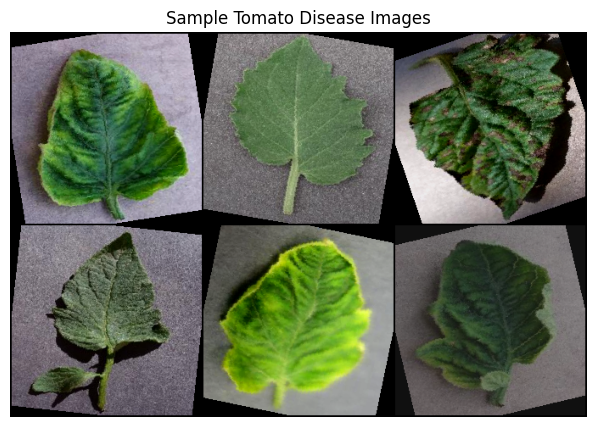

Image 1: Yellow Leaf Curl Virus
Image 2: Healthy
Image 3: Early Blight
Image 4: Healthy
Image 5: Yellow Leaf Curl Virus
Image 6: Yellow Leaf Curl Virus


In [145]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# Function to display images from the dataset
def show_images_from_loader(loader, classes, num_images=6):
    images, labels = next(iter(loader))  # Get a batch of images
    images = images[:num_images]  # Take only the first few images
    labels = labels[:num_images]

    # Convert images to numpy format for plotting
    img_grid = make_grid(images, nrow=3, normalize=True).numpy()
    img_grid = np.transpose(img_grid, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)

    # Display the images
    plt.figure(figsize=(10, 5))
    plt.imshow(img_grid)
    plt.axis("off")
    plt.title("Sample Tomato Disease Images")
    plt.show()

    # Print labels
    for i, label in enumerate(labels):
        print(f"Image {i+1}: {classes[label]}")

# Show images from training dataset
show_images_from_loader(train_loader, train_dataset.classes)


Viewing specific diseases

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.5137255].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..0.7411765].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8666667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.49803925].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.56078434].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.56078434].


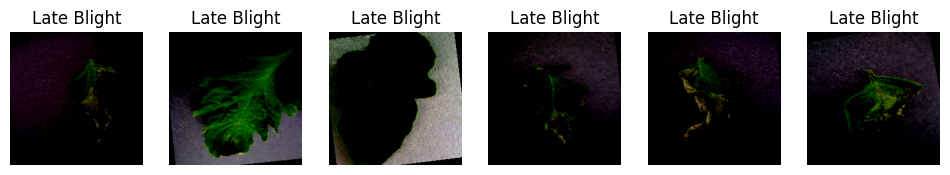

In [95]:
import random

def show_specific_disease(dataset, disease_name, num_images=6):
    indices = [i for i, (_, label) in enumerate(dataset) if dataset.classes[label] == disease_name]
    selected_indices = random.sample(indices, min(num_images, len(indices)))

    fig, axes = plt.subplots(1, len(selected_indices), figsize=(12, 5))
    for i, idx in enumerate(selected_indices):
        image, label = dataset[idx]
        image = np.transpose(image.numpy(), (1, 2, 0))  # Convert to (H, W, C)
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"{disease_name}")

    plt.show()

# Example: View only "Late Blight" tomato images
show_specific_disease(train_dataset, "Late Blight")


viewing a single image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..0.39607847].


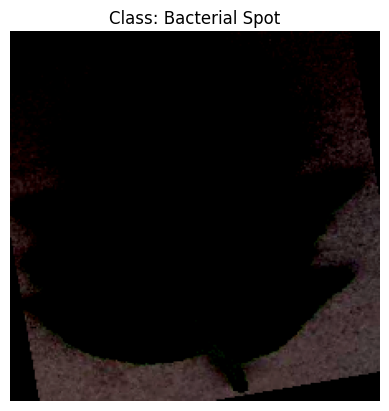

In [69]:
image, label = train_dataset[605]  # Get the first image
plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Convert format for display
plt.axis("off")
plt.title(f"Class: {train_dataset.classes[label]}")
plt.show()


Real image predictions

Predicted Class: Early Blight


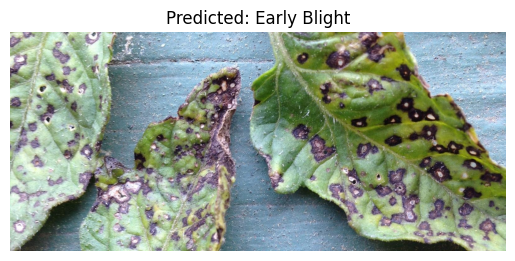

In [146]:

import torch
import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define function to predict an image from a Google URL
def predict_google_image(image_url, model, classes, device):
    model.eval()  # Set model to evaluation mode
    
    # Define the same image transformations used in training
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    
    try:
        # Download the image from the URL
        response = requests.get(image_url)
        if response.status_code != 200:
            print("Error: Unable to download image.")
            return
        
        # Open the image
        image = Image.open(BytesIO(response.content)).convert("RGB")

        # Preprocess the image
        processed_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

        # Make prediction
        with torch.no_grad():
            outputs = model(processed_image)
            _, predicted = torch.max(outputs, 1)

        predicted_class = classes[predicted.item()]
        print(f"Predicted Class: {predicted_class}")

        # Display the image with prediction
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Predicted: {predicted_class}")
        plt.show()

    except Exception as e:
        print(f"Error processing image: {e}")

# Ensure the model is on the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example Google Image URL of a tomato leaf (replace with any image URL)
image_url = "https://extension.umd.edu/sites/extension.umd.edu/files/styles/optimized/public/2021-05/hgic_veg_septoria%20leaf%20spot1_1600.jpg?itok=JcaVf2-g"
# Run the function to predict
predict_google_image(image_url, model, train_dataset.classes, device)


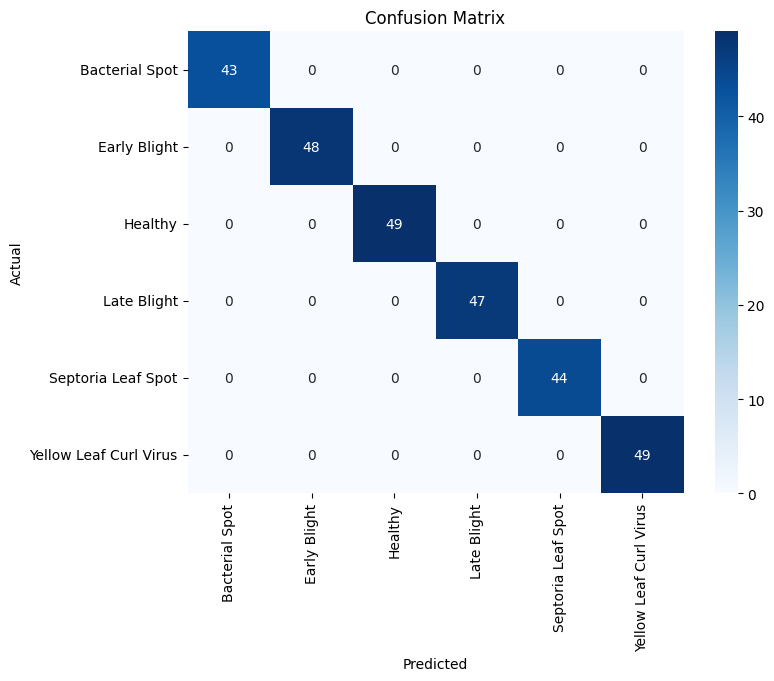

In [99]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, loader, classes):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Run this on the test set
plot_confusion_matrix(model, test_loader, train_dataset.classes)


In [138]:
from collections import Counter

# Count how many times each class appears in the dataset
class_counts = Counter([label for _, label in train_dataset])
for class_name, count in class_counts.items():
    print(f"{train_dataset.classes[class_name]}: {count} images")


Bacterial Spot: 1702 images
Early Blight: 1920 images
Healthy: 1926 images
Late Blight: 1851 images
Septoria Leaf Spot: 1748 images
Yellow Leaf Curl Virus: 1961 images


In [139]:
images, labels = next(iter(val_loader))  # Take a batch from validation
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

# Print predictions
for i in range(len(images)):
    print(f"Actual: {val_dataset.classes[labels[i].item()]}, Predicted: {val_dataset.classes[preds[i].item()]}")


Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
Actual: Bacterial Spot, Predicted: Bacterial Spot
